In [76]:
#Importing Libraies
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [77]:
#Setting the current working directory
os.chdir("D:/Data Science/Projects/Project 2")

In [78]:
os.getcwd()

'D:\\Data Science\\Projects\\Project 2'

In [79]:
## Reading data from the current directory
day_data = pd.read_csv("day.csv")

In [80]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
day_data.shape

(731, 16)

In [82]:
## Creating copy of data
day_data_copy=day_data.copy()

In [83]:
day_data_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [84]:
## Removing those variables which does seem to have any relevance
day_data_copy = day_data_copy.drop(['instant','dteday','casual','registered'],axis =1)

In [85]:
day_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [86]:
## Missing value Analysis
missing_val = pd.DataFrame(day_data_copy.isnull().sum())
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


In [87]:
## Getting all the float column from the data frame
## Create the list of numeric Variable
list_numeric_data = []
for i in range(0, day_data_copy.shape[1]):
    if day_data_copy.iloc[:,i].dtypes == 'float64':
        list_numeric_data.append(day_data_copy.columns[i])

In [88]:
## Converting all the integer variable to categorical variable except of target variable

for i in range(0,day_data_copy.shape[1]):
    if day_data_copy.iloc[:,i].dtypes == 'int64' :
        day_data_copy.iloc[:,i] = day_data_copy.iloc[:,i].astype('category')

In [89]:
day_data_copy["cnt"]=day_data_copy["cnt"].astype('int64')

In [90]:
day_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


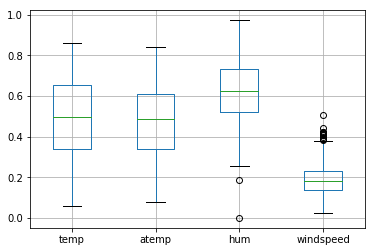

In [91]:
## Outlier Analysis
## Creating Box Plot for Outlier Analysis
day_data_copy.boxplot(column=list_numeric_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E17ECACF8>,
      dtype=object)

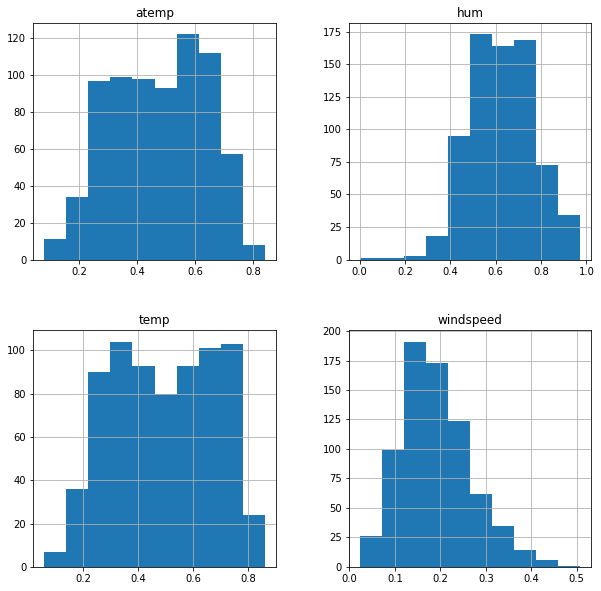

In [92]:
## Plotting Histogram for checking the skewness in the data set
day_data_copy.hist(column=list_numeric_data,figsize = (10,10))

In [93]:
## Outlier Analysis
## Replacing outlier with floor and ceiling of particular variable
for i in list_numeric_data:
    print(i)
    #Extract Quartiles
    q75,q25=np.percentile(day_data_copy.loc[:,i],[ 75,25])
    
    #Calculate IQR
    iqr = q75-q25
    
    #Calculating Minimum and Maximum values or Inner and Outer fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    #Replacing Outliers with NA
    day_data_copy.loc[day_data_copy[i] < min,i] = min
    day_data_copy.loc[day_data_copy[i] > max,i] = max 

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E17FCDC18>,
      dtype=object)

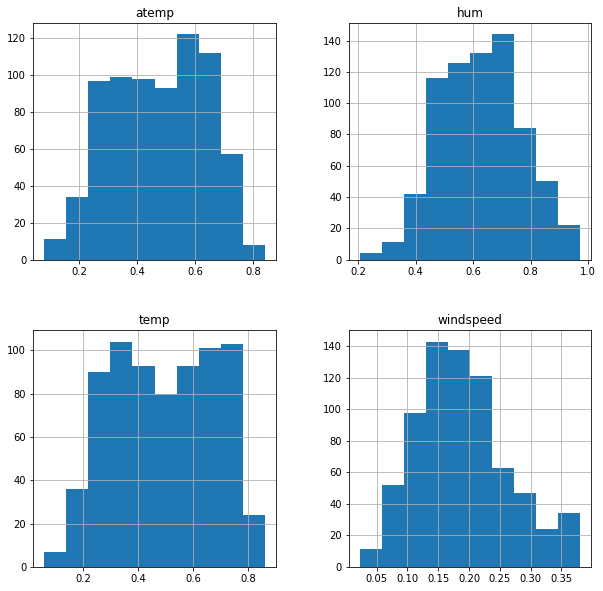

In [94]:
## Creating histogram after removing the outliers from the data set.
day_data_copy.hist(column=list_numeric_data,figsize = (10,10))

In [95]:
day_data_copy.sort_values('windspeed').tail(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
433,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.380611,4569
44,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.380611,1913
94,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.380611,1795
93,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.380611,3115
666,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.380611,4459
382,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.380611,3376
450,2,1,3,0,1,1,1,0.445833,0.438750,0.477917,0.380611,5558
420,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.380611,2732
407,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.380611,1529
721,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.380611,1749


In [96]:
### Feature Selection 
## Correlation PLot

day_cor = day_data_copy.loc[: ,list_numeric_data]

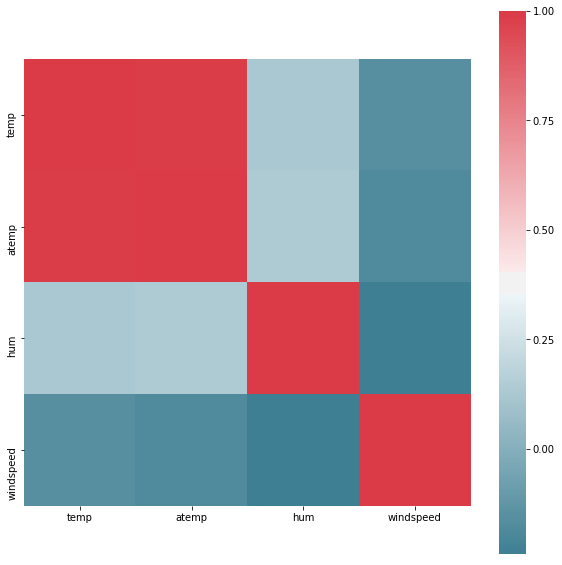

In [97]:
### Setting the width and Height

f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = day_cor.corr()

#Plot using seaborn library

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [100]:
## Removing Feature "atemp" since it is highly correlated to temp
day_data_copy = day_data_copy.drop(['atemp'],axis = 1)

KeyError: "labels ['atemp'] not contained in axis"

In [99]:
day_data_copy.shape

(731, 11)

In [101]:
## Spliting train and test data using sklearn.model_selection library
seed=1234
np.random.seed(seed)
data_x = day_data_copy.iloc[:,0:10]
data_y = day_data_copy.iloc[:,10]
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size = 0.2)

In [102]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((147, 10), (584, 10), (584,), (147,))

In [105]:
## Defining all the required functions
##Creating MAPE function to calculate the error in the model
def MAPE (y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred)/y_true))*100
    return round(mape,2)

## Creating MAE function
def MAE (y_true,y_pred):
    mae=np.mean(np.abs(y_true - y_pred))
    return round(mae,2)

## Creating RMSE function
def RMSE (y_true,y_pred):
    rmse=np.sqrt(np.mean(np.power((y_true-y_pred),2)))
    return round(rmse,2)


def Acc (y_true,y_pred):
    mean_pc = MAPE(y_true,y_pred)
    mean_abs = MAE(y_true,y_pred)
    root_mn_sq = RMSE(y_true,y_pred)
    Accuracy = 100 - mean_pc
    print ("Mean Absolute Error = ", mean_abs)
    print ("Mean Absolute Percentage Error : ", mean_pc)
    print ("Root Mean Square Error : ", root_mn_sq)
    print ("Accuracy : ", Accuracy)

In [109]:
## Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

In [110]:
#predicting the values of test data
predict_dt = dt_model.predict(x_test)

In [111]:
Acc (y_test,predict_dt)

Mean Absolute Error =  572.69
Mean Absolute Percentage Error :  17.83
Root Mean Square Error :  809.67
Accuracy :  82.17


In [114]:
## Linear Regression using stats library

# train the model using training set
model_lr = sm.OLS(y_train,x_train.astype(float)).fit()

In [115]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1637.
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:32:49   Log-Likelihood:                -4806.8
No. Observations:                 584   AIC:                             9634.
Df Residuals:                     574   BIC:                             9677.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       559.6689     66.942      8.360      0.000     428.187     691.150
yr          2176.8079     75.032     29.012      0.000    2029.438    2324.178
mnth         -44.5905     21.245     -2.099      0.036     -86.318      -2.863
holiday     -367.7707    240.026     -1.532      0.126    -839.207     103.665
weekday       98.0738     18.873      5.196      0.000      61.005     135.143
workingday   175.0737     83.940      2.086      0.037      10.207     339.941
weathersit  -660.2045     93.615     -7.052      0.000    -844.075    -476.334
temp        5529.8281    222.754     24.825      0.000    5092.315    5967.341
hum          361.7211    301.602      1.199      0.231    -230.657     954.099
windspeed   -925.8991    429.119     -2.158      0.031   -1768.734     -83.064
==============================================================================
Omnibus:                       94.271   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.414
Skew:                          -0.872   Prob(JB):                     3.36e-46
Kurtosis:                       5.358   Cond. No.                         96.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
## Predicting the values of target variable of test data set
predictions_LR = model_lr.predict(x_test)

In [119]:
## Evaluating the Linear Regression Model
Acc(y_test,predictions_LR)

Mean Absolute Error =  664.2
Mean Absolute Percentage Error :  18.73
Root Mean Square Error :  857.98
Accuracy :  81.27


In [120]:
## Random Forest Algorithm 
rf_model = RandomForestRegressor().fit(x_train,y_train)

In [121]:
## Predicting the values of target variable of test data set
predications_rf = rf_model.predict(x_test)

In [122]:
## Evaluating the Random Forest Model with default parameters
Acc(y_test,predications_rf)

Mean Absolute Error =  451.52
Mean Absolute Percentage Error :  14.4
Root Mean Square Error :  632.39
Accuracy :  85.6


In [123]:
## Random Forest with Hyperparameter tuning using Randomized Search CV

## Hypertuning of parameters of random forest
##Number of tree in random forest
n_estimators = [100, 200 ]
#Number of features to consider at each split
max_features = ['auto','sqrt']
#Maximum Number of levels in a tree
max_depth = [5,10,15,20,25]

#Method of selecting samples of training each tree
bootstrap = [True, False]

#minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum Number of samples required at each leaf node
min_samples_leaf = [1,2,4]

In [124]:
## Create the random Grid
random_grid = { 'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'bootstrap' : bootstrap,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [125]:
from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]}


In [126]:
## Use the random grid to search for the best parameters
rf_tune = RandomForestRegressor()
## Random Search of parameter, using 3 fold cross validation, search across 100 different combinations and use all available cores
rf_random_tun = RandomizedSearchCV(estimator = rf_tune, param_distributions = random_grid ,
                               n_iter = 100 , cv = 3, verbose = 2, random_state = 42,n_jobs = -1)

In [127]:
## Fit the random search model 
rf_random_tun.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [128]:
## Best parameters
rf_random_tun.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [129]:
best_model = rf_random_tun.best_estimator_

In [130]:
## Predicting the values of target variables of test data set
rf_tune_predictions = best_model.predict(x_test)

In [131]:
## Evaluating the random forest model with hyperparameter tuning
Acc(y_test,rf_tune_predictions)

Mean Absolute Error =  436.22
Mean Absolute Percentage Error :  14.75
Root Mean Square Error :  598.34
Accuracy :  85.25


In [132]:
## Applying Grid Search CV on Random Forest Model for tuning the parameter of model.
## Create parameters based on the result of random search
param_grid = {
    'bootstrap' : [True],
    'max_depth' : [5,10,20,30],
    'max_features' : [2,3,4],
    'min_samples_leaf' : [3,4,5],
    'min_samples_split' : [8,10,20],
    'n_estimators' : [100,200,300]
}

In [133]:
#Create a base model
rf_grid = RandomForestRegressor()

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [134]:
## Fitting the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 20, 30], 'max_features': [2, 3, 4], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 20], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [135]:
## Best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [136]:
best_grid = grid_search.best_estimator_

In [137]:
## Predicting the values of target variable for test data set
rf_grid_predictions = best_grid.predict(x_test)

In [138]:
## Evaluating the model
Acc(y_test,rf_grid_predictions)

Mean Absolute Error =  443.5
Mean Absolute Percentage Error :  14.77
Root Mean Square Error :  614.06
Accuracy :  85.23


In [139]:
#XGBoost algorithm with default parameters 
gbm_wp = xgb.XGBRegressor().fit(x_train.astype('float'),y_train)

In [140]:
gbm_wp_predict = gbm_wp.predict(x_test.astype('float'))

In [141]:
Acc(y_test,gbm_wp_predict)

Mean Absolute Error =  425.0
Mean Absolute Percentage Error :  13.13
Root Mean Square Error :  600.83
Accuracy :  86.87


In [142]:
## Extreme Gradient Boosting algorithm with Parameter Tuning
DM_train = xgb.DMatrix(data = x_train.astype(float), label = y_train)
DM_test = xgb.DMatrix ( data = x_test.astype(float), label = y_test)

In [143]:
gbm_param_grid = {
     'learning_rate': [0.1,0.2,0.3],
     'n_estimators':[150, 200],
     'max_depth': [5],
    'colsample_bytree' : [0.6]
}

In [144]:
gbm = xgb.XGBRegressor()

In [145]:
grid_mse = GridSearchCV(estimator = gbm , param_grid = gbm_param_grid, 
                        scoring = 'neg_mean_squared_error', cv = 10, verbose = 1)

In [146]:
grid_mse.fit(x_train.astype(float),y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [150, 200], 'max_depth': [5], 'colsample_bytree': [0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [147]:
print("Best parameters found:", grid_mse.best_params_)

Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [148]:
print("Lowest RMSE found:", np.sqrt(np.abs(grid_mse.best_score_)))

Lowest RMSE found: 650.7952390896755


In [149]:
## Predicting the values of target variable of test data set
pred_xgb = grid_mse.predict(x_test.astype('float'))

In [150]:
Acc(y_test,pred_xgb)

Mean Absolute Error =  401.85
Mean Absolute Percentage Error :  12.38
Root Mean Square Error :  566.16
Accuracy :  87.62
